In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [144]:
df=pd.read_csv('Crop_recommendation.csv')

In [145]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2104,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
971,32,14,37,22.730313,88.485679,6.825256,104.684324,pomegranate
1622,8,7,10,28.262049,91.983174,6.929216,105.213226,orange
127,75,49,15,21.535741,71.509060,5.918264,102.485293,maize


In [146]:
df.shape

(2200, 8)

In [147]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

# Exploratory Data Analysis

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [149]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [150]:
le=LabelEncoder()

In [151]:
df['label']=le.fit_transform(df['label'])

In [152]:
y=df['label']
x=df.drop('label',axis=1)

In [153]:
scaler=StandardScaler()

In [154]:
x_scaled=scaler.fit_transform(x)

In [155]:
pca=PCA()

In [156]:
x_trans=pca.fit_transform(x_scaled)

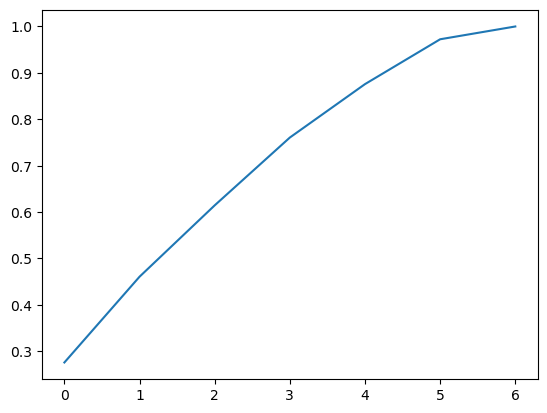

In [157]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [158]:
pca=PCA(n_components=7)

In [159]:
x_trans=pca.fit_transform(x_scaled)

In [222]:
kmeans=KMeans(n_clusters=22,random_state=42,init='k-means++',n_init=10,max_iter=300)

In [223]:
x_kmeans=kmeans.fit(x_trans)

In [224]:
import seaborn as sns
from scipy.stats import mode

In [225]:
y_kmeans=x_kmeans.labels_

In [226]:
def map_clusters_to_labels(y,y_kmeans):
    labels=np.zeros_like(y_kmeans)
    for i in range(22):
        mask=(y_kmeans==i)
        labels[mask]=mode(y[mask])[0]
    return labels

In [227]:
y_pred_encoded=map_clusters_to_labels(y,y_kmeans)

In [228]:
y_pred=le.inverse_transform(y_pred_encoded)

In [232]:
y_pred

array(['jute', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)